In [2]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

In [4]:
yellow=pd.read_csv("yellow_trips.csv.gz")

In [7]:
print(yellow.columns)

Index(['pickup_datetime', 'dropoff_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance', 'total_amount', 'YYYY', 'M', 'D',
       'YYYYMM', 'YYYYMD'],
      dtype='object')


In [6]:
yellow['YYYY'] = pd.DatetimeIndex(yellow['pickup_datetime']).year
yellow['M'] = pd.DatetimeIndex(yellow['pickup_datetime']).month
yellow['D'] = pd.DatetimeIndex(yellow['pickup_datetime']).day
yellow["YYYYMM"]=yellow.YYYY.astype(str) + yellow.M.astype(str)
yellow["YYYYMD"]=yellow.YYYY.astype(str) + yellow.M.astype(str)+ yellow.D.astype(str)

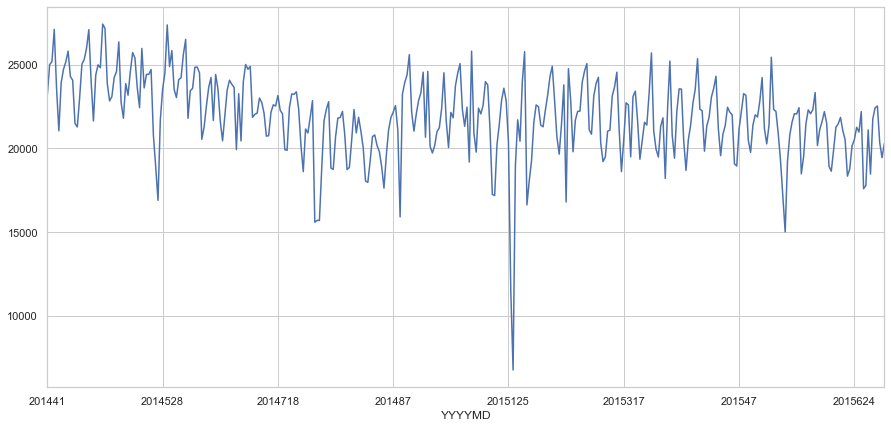

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
yellow.groupby('YYYYMD')["pickup_datetime"].count().plot(ax=ax)


In [10]:
yellowNP=yellow.groupby(["YYYYMD","YYYY","M","D"])["pickup_datetime"].count()

In [11]:
yellowNP.to_csv("yellowNP.csv",  header=True)